In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
import pyproj

D = pd.read_excel(r'C:\Users\ag\HugeData\EGRIP GPS\GPSprocess\output\summary.xlsx')
stake = 'EG-C-500'

pstereo = pyproj.Proj('+init=EPSG:3413 +units=m')#+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=1 +y_0=1 +datum=WGS84 +units=m +no_defs')


D['x'],D['y'] = pstereo(D['lon'].values,D['lat'].values)
D = D.loc[D['id'] == stake]

D.iloc[0]



id                     EG-C-500
datetime    2016-07-29 21:55:30
lat                     75.8122
lon                    -35.4564
z                       2669.13
sigmaE                   0.0028
sigmaN                   0.0034
sigmaZ                   0.0069
x                        256077
y                  -1.52313e+06
Name: 176, dtype: object

In [2]:
t = (D['datetime']-datetime.datetime(2015,1,1))/datetime.timedelta(days=365.25)
D['x'] = D['x']-D.iloc[0]['x']
D['y'] = D['y']-D.iloc[0]['y']

dist=np.sqrt(D['y']**2+D['x']**2)

py=np.polyfit(t,D['y'],1,w = 1/D['sigmaN'])
px=np.polyfit(t,D['x'],1,w = 1/D['sigmaE'])
pdist=np.polyfit(t,dist,2,w = 1/D['sigmaE'])

print(np.sqrt(px[0]**2+py[0]**2))
print(pdist)

58.36909454923694
[ 1.11576409e-02  5.83112219e+01 -9.19454814e+01]


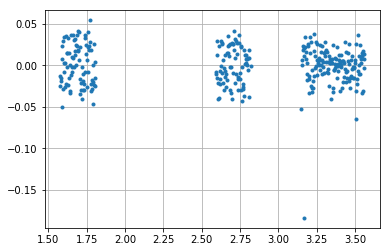

In [4]:

plt.plot(t,dist-np.polyval(pdist,t),'.')
plt.grid()